# PCA ON BOSTON HOUSE PRICES DATASET

## The main idea of Principal Component Analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, while retaining the variation present in the dataset, up to the maximum extent. 


In [9]:
# IMPORTING REQUIRED MODULES
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
%matplotlib inline 
plt.style.use('seaborn')

# IMPORTING THE BOSTON HOUSE PRICES DATASET

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
X=boston["data"]
Y=boston["target"]
names=boston["feature_names"]

In [12]:
df_boston = pd.DataFrame(X,columns=names)
df_boston['target'] = pd.Series(Y)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# DATA PREPROCESSING

In [13]:
#Checking if there is any existing null value or not
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

# EXPLORATORY DATA ANALYSIS(EDA)

In [27]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


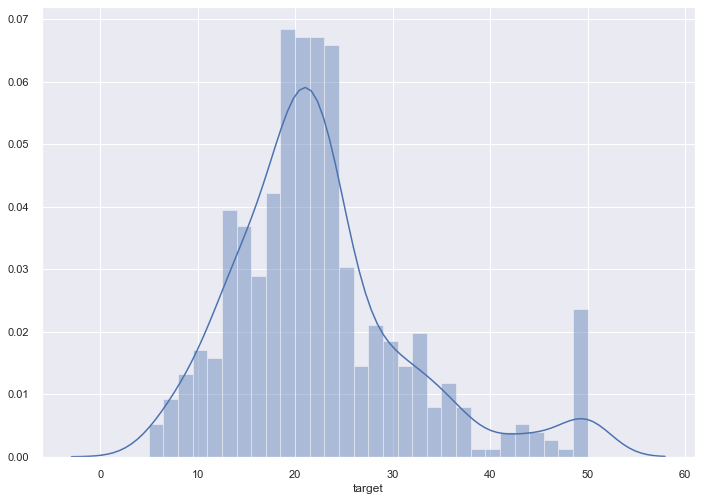

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_boston['target'], bins=30)
plt.show()

##  Inference: We see that the values of 'target' are distributed normally with few outliers.

## 2.Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

## The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

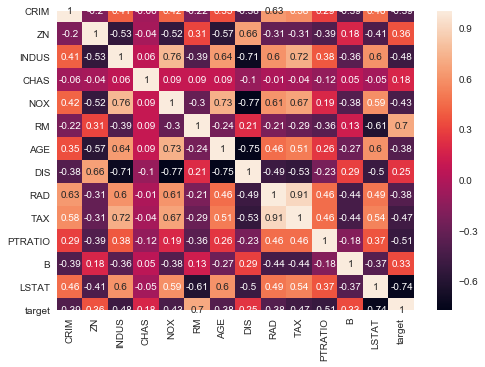

In [15]:
correlation_matrix = df_boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Observations:

## 1.To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

## 2.An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

# USE OF STANDARD SCALER

In [16]:
from sklearn.preprocessing import StandardScaler 

In [17]:
scalar = StandardScaler()

# FITTING

In [18]:
# fitting 
scalar.fit(df_boston) 
scaled_data = scalar.transform(df_boston) 

# USE OF PCA()

In [21]:
# Importing PCA 
from sklearn.decomposition import PCA

In [22]:
# Let's say, components = 2 
pca = PCA(n_components = 2) 
pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data) 

# DISPLAYING PRINCIPAL COMPONENTS

In [24]:
principal_df=pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])
principal_df.head()

,principal component 1,principal component 2
0,-2.087344,0.492853
1,-1.373382,-0.170924
2,-2.376553,0.914028
3,-2.837779,0.194871
4,-2.772916,0.433300


# Concatenating Principal Components with Target Values

In [25]:
finalDf = pd.concat([principal_df, df_boston[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.087344,0.492853,24.0
1,-1.373382,-0.170924,21.6
2,-2.376553,0.914028,34.7
3,-2.837779,0.194871,33.4
4,-2.772916,0.433300,36.2


# This is our required Dataset which has Been reduced from (506,14) to (506,3)


# PLOTTING OF PRINCIPAL COMPONENTS

Text(0, 0.5, 'Second Principal Component')

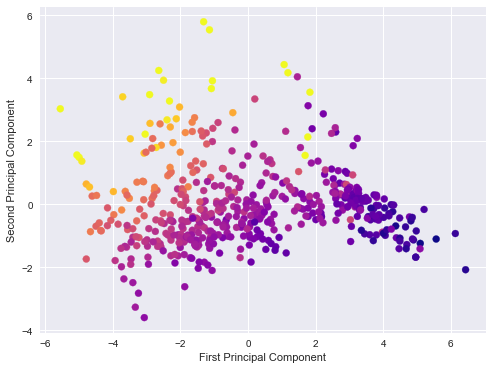

In [26]:
# giving a larger plot 
plt.figure(figsize =(8, 6)) 
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = boston['target'], cmap ='plasma') 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 